# Étape 1: Importer les packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Étape 2: Charger les données

In [ ]:
# Dataset pour la classification : Iris
iris_data = pd.read_csv('INTERROGATION/iris.data', header=None, 
                        names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [ ]:
# Dataset pour la classification : Iris
iris_data = pd.read_csv('iris.data', header=None, 
                        names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])


In [3]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Étape 3: Analyse de données
print("Analyse du dataset Iris (Classification):")
print("\nRésumé statistique:")
print(iris_data.describe())
print("\nValeurs manquantes:")
print(iris_data.isnull().sum())
print("\nDistribution des classes:")
print(iris_data['class'].value_counts())


Analyse du dataset Iris (Classification):

Résumé statistique:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Valeurs manquantes:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

Distribution des classes:
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


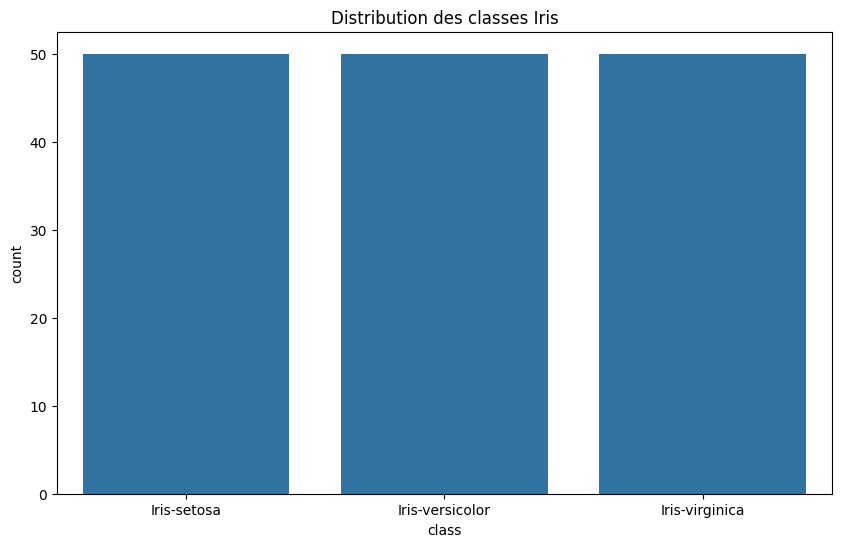

In [5]:
# Visualisation : Distribution des classes
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=iris_data)
plt.title('Distribution des classes Iris')
plt.show()

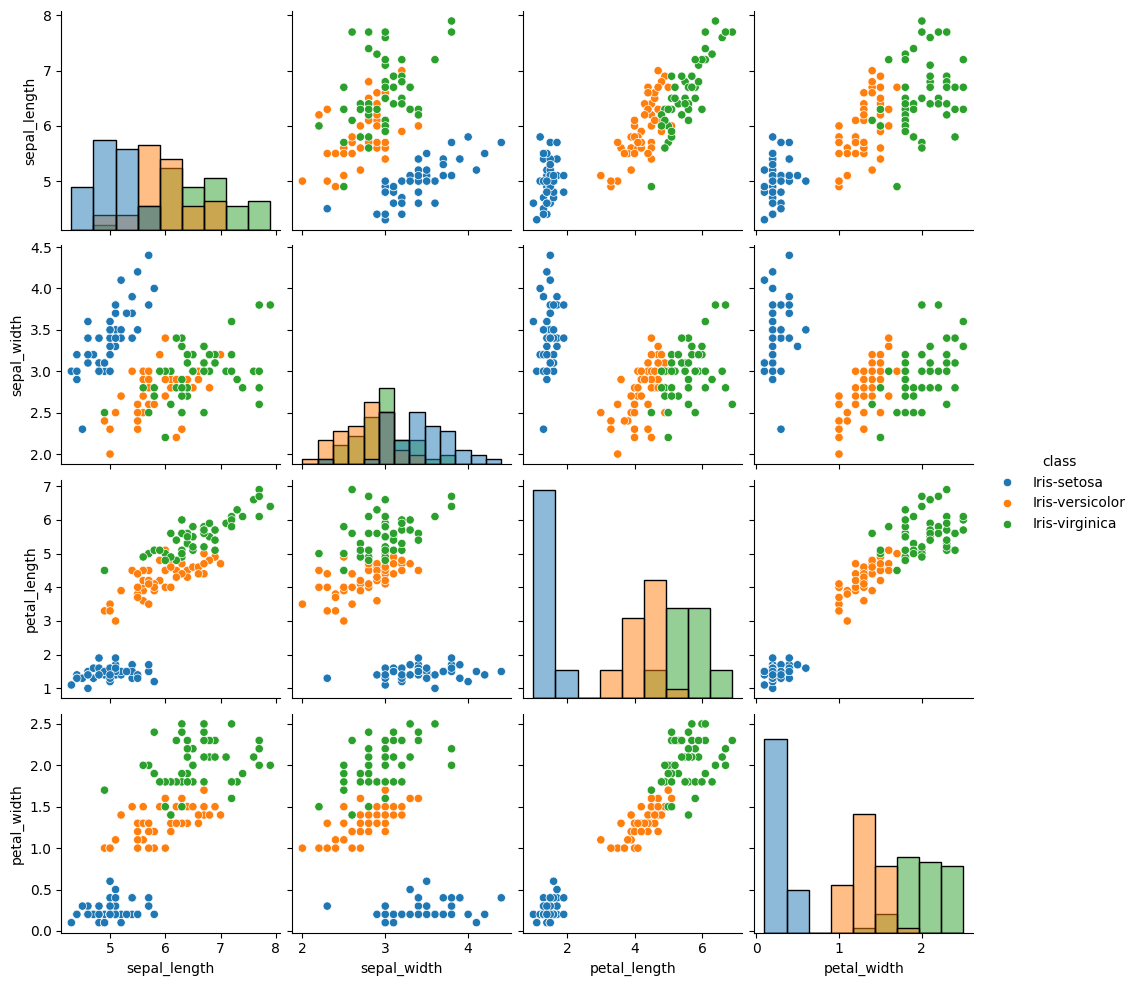

In [6]:
# Visualisation : Pair plot
sns.pairplot(iris_data, hue='class', diag_kind='hist')
plt.show()


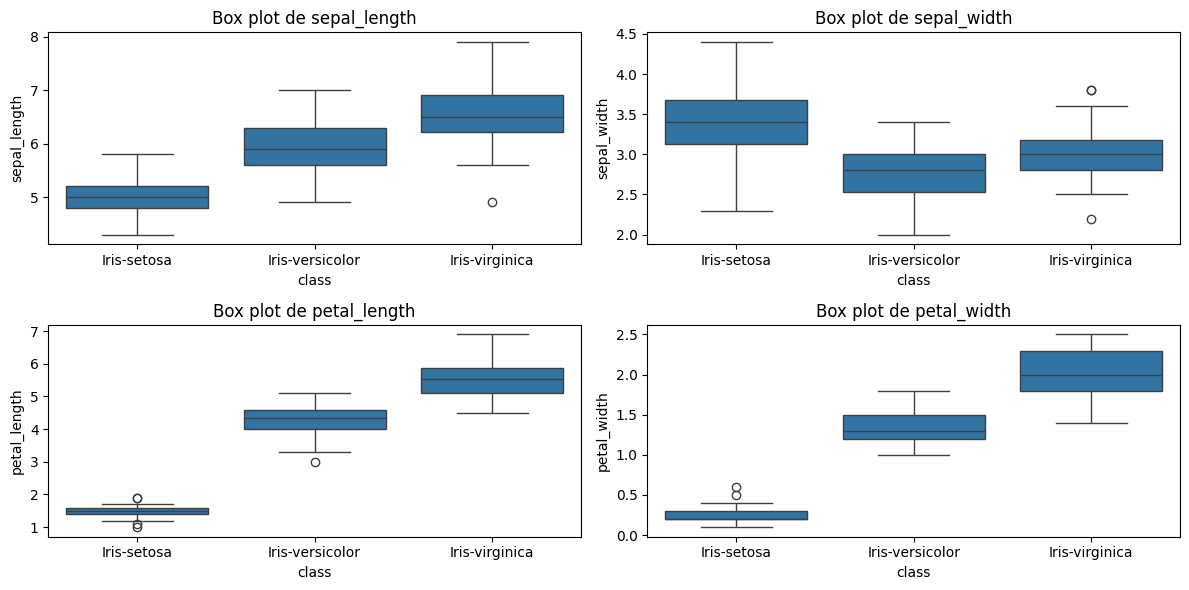

In [7]:
# Visualisation : Box plots par classe
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris_data.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='class', y=feature, data=iris_data)
    plt.title(f'Box plot de {feature}')
plt.tight_layout()
plt.show()

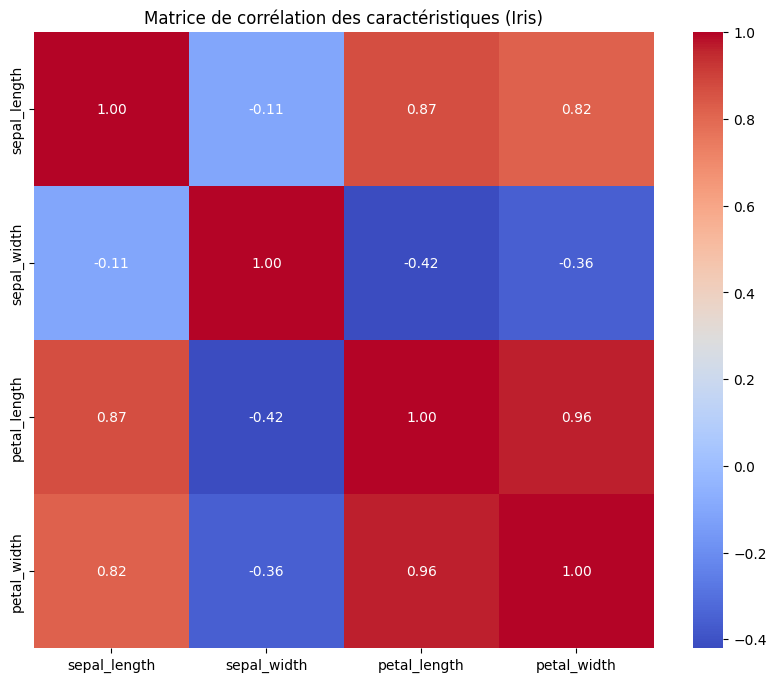

In [8]:
# Visualisation : Heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(iris_data.drop('class', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation des caractéristiques (Iris)')
plt.show()

# Étape 4: Prétraitement des données

In [9]:
X_clf = iris_data.drop('class', axis=1)
y_clf = iris_data['class']


In [10]:
# Encoder les classes
label_encoder = LabelEncoder()
y_clf_encoded = label_encoder.fit_transform(y_clf)
y_clf_cat = pd.get_dummies(y_clf_encoded).values
class_names = label_encoder.classes_


In [11]:
# Normalisation
scaler_clf = StandardScaler()
X_clf_scaled = scaler_clf.fit_transform(X_clf)

# Étape 5: Diviser les données

In [12]:
# Étape 5: Diviser les données
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf_scaled, y_clf_encoded, test_size=0.2, random_state=42)
y_clf_train_cat = pd.get_dummies(y_clf_train).values
y_clf_test_cat = pd.get_dummies(y_clf_test).values

# Étape 6: Construire les modèles

In [13]:
# Étape 6: Construire les modèles
# Shallow Neural Network
input_dim = X_clf_train.shape[1]
num_classes = y_clf_train_cat.shape[1]
model_clf = Sequential()
model_clf.add(Dense(64, input_shape=(input_dim,), activation='relu'))
model_clf.add(Dense(32, activation='relu'))
model_clf.add(Dense(num_classes, activation='softmax'))
model_clf.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_clf.summary()

c:\Users\user\anaconda3\envs\peneumo\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Entraînement
history_clf = model_clf.fit(X_clf_train, y_clf_train_cat, epochs=100, batch_size=32, verbose=1, validation_data=(X_clf_test, y_clf_test_cat))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9385 - loss: 0.1273 - val_accuracy: 1.0000 - val_loss: 0.0823
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9719 - loss: 0.0938 - val_accuracy: 1.0000 - val_loss: 0.0814
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9740 - loss: 0.0852 - val_accuracy: 1.0000 - val_loss: 0.0806
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9708 - loss: 0.0875 - val_accuracy: 1.0000 - val_loss: 0.0784
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9708 - loss: 0.0927 - val_accuracy: 1.0000 - val_loss: 0.0765
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9469 - loss: 0.1194 - val_accuracy: 1.0000 - val_loss: 0.0739
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9604 - loss: 0.0869 - val_accuracy: 1.0000 - val_loss: 0.0718
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9848 - loss: 0.0791 - val_accuracy: 1.0000 - val_loss:

In [16]:
# Algorithmes classiques
clf_algorithms = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB()
}


In [17]:
# Entraîner les modèles
clf_results = {}
for name, model in clf_algorithms.items():
    model.fit(X_clf_train, y_clf_train)
    y_pred = model.predict(X_clf_test)
    clf_results[name] = {
        'Accuracy': accuracy_score(y_clf_test, y_pred),
        'Precision': precision_score(y_clf_test, y_pred, average='weighted'),
        'Recall': recall_score(y_clf_test, y_pred, average='weighted'),
        'F1': f1_score(y_clf_test, y_pred, average='weighted')
    }


# Étape 7: Visualiser l'évolution de l'entraînement

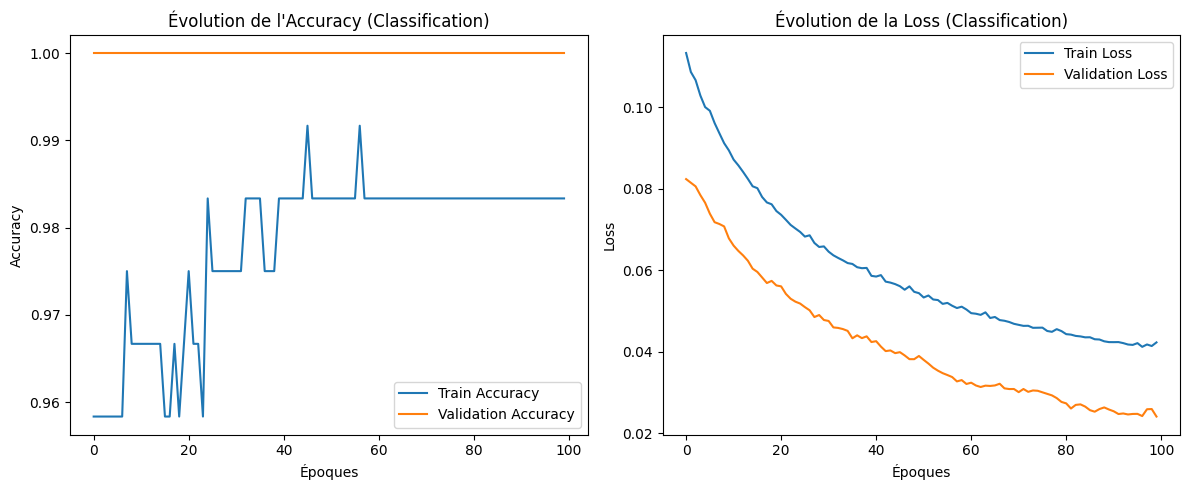

In [18]:
# Étape 7: Visualiser l'évolution de l'entraînement
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_clf.history['accuracy'], label='Train Accuracy')
plt.plot(history_clf.history['val_accuracy'], label='Validation Accuracy')
plt.title("Évolution de l'Accuracy (Classification)")
plt.xlabel("Époques")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_clf.history['loss'], label='Train Loss')
plt.plot(history_clf.history['val_loss'], label='Validation Loss')
plt.title("Évolution de la Loss (Classification)")
plt.xlabel("Époques")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Étape 8: Évaluer le modèle

In [19]:
# Étape 8: Évaluer le modèle
# Neural Network
y_clf_pred_nn = np.argmax(model_clf.predict(X_clf_test), axis=1)
clf_results['Neural Network'] = {
    'Accuracy': accuracy_score(y_clf_test, y_clf_pred_nn),
    'Precision': precision_score(y_clf_test, y_clf_pred_nn, average='weighted'),
    'Recall': recall_score(y_clf_test, y_clf_pred_nn, average='weighted'),
    'F1': f1_score(y_clf_test, y_clf_pred_nn, average='weighted')
}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


In [20]:
# Afficher les métriques et matrices de confusion
print("\nMétriques pour la classification:")
for name, metrics in clf_results.items():
    print(f"\n{name}:")
    print(f"Accuracy = {metrics['Accuracy']:.4f}, Precision = {metrics['Precision']:.4f}, "
          f"Recall = {metrics['Recall']:.4f}, F1 = {metrics['F1']:.4f}")


Métriques pour la classification:

Logistic Regression:
Accuracy = 1.0000, Precision = 1.0000, Recall = 1.0000, F1 = 1.0000

Decision Tree:
Accuracy = 1.0000, Precision = 1.0000, Recall = 1.0000, F1 = 1.0000

Random Forest:
Accuracy = 1.0000, Precision = 1.0000, Recall = 1.0000, F1 = 1.0000

SVM:
Accuracy = 1.0000, Precision = 1.0000, Recall = 1.0000, F1 = 1.0000

Naive Bayes:
Accuracy = 1.0000, Precision = 1.0000, Recall = 1.0000, F1 = 1.0000

Neural Network:
Accuracy = 1.0000, Precision = 1.0000, Recall = 1.0000, F1 = 1.0000


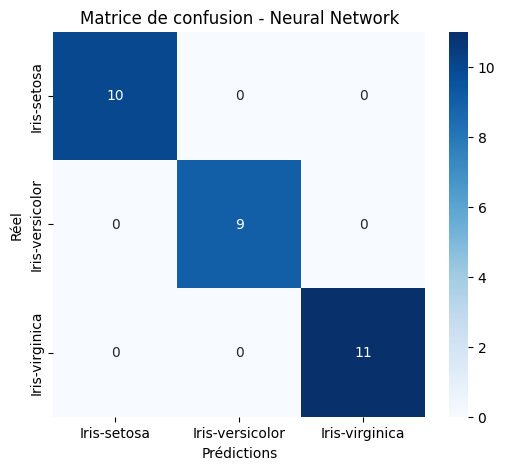

In [21]:
# Matrice de confusion pour Neural Network
cm_nn = confusion_matrix(y_clf_test, y_clf_pred_nn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Matrice de confusion - Neural Network")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

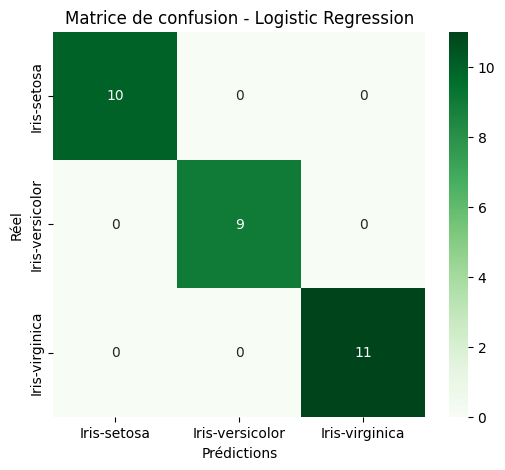

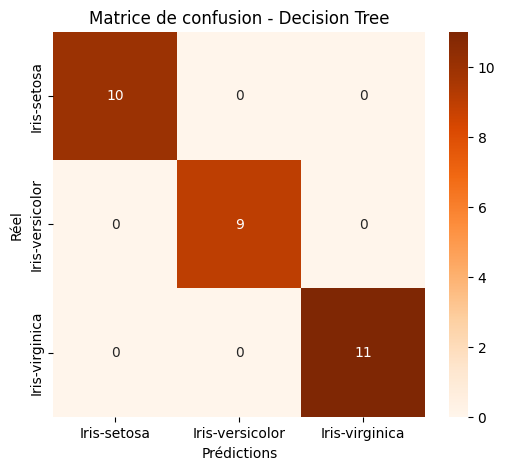

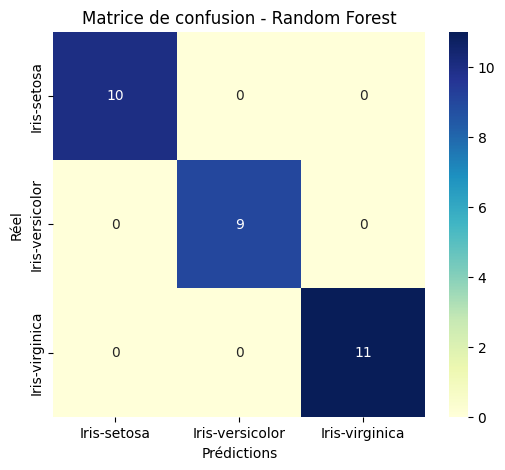

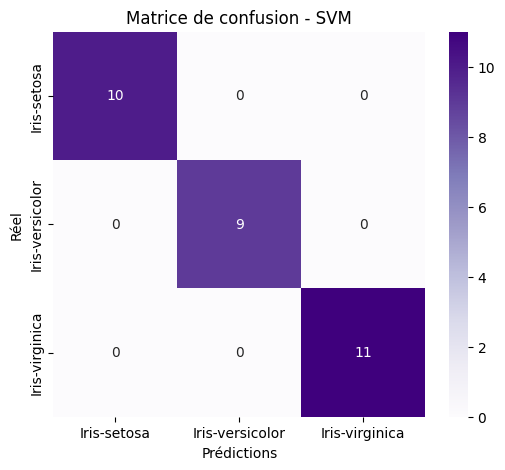

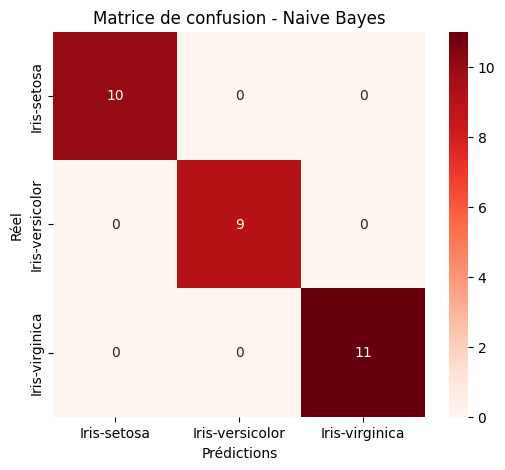

In [22]:
# Matrices de confusion pour les autres modèles
for name, model in clf_algorithms.items():
    y_pred = model.predict(X_clf_test)
    cm = confusion_matrix(y_clf_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap={
        'Logistic Regression': 'Greens',
        'Decision Tree': 'Oranges',
        'Random Forest': 'YlGnBu',
        'SVM': 'Purples',
        'Naive Bayes': 'Reds'
    }[name], xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédictions")
    plt.ylabel("Réel")
    plt.show()